In [1]:
import datetime
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow
import keras
from tensorflow.keras.callbacks import EarlyStopping

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
source_file = '../../../../PrevisaoVento/Data/process/cenario1/dados_cenario1.csv'
dataframe = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])

In [3]:
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Longitude      8760 non-null   float64       
 1   Latitude       8760 non-null   float64       
 2   VentoPrevisto  8760 non-null   float64       
 3   Direcao        8760 non-null   float64       
 4   Data           8760 non-null   datetime64[ns]
 5   Pressao        8760 non-null   float64       
 6   Temperatura    8760 non-null   float64       
 7   Chuva          8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 615.9 KB


In [4]:
df_day = dataframe[['Data', 'VentoPrevisto', 'Chuva', 'Pressao','Temperatura','Direcao']].groupby('Data').mean()
df_day.head(2)

,VentoPrevisto,Chuva,Pressao,Temperatura,Direcao
Data,,,,,
2017-01-01 00:00:00,6.82,0.0,1013.14,25.93,97.36
2017-01-01 01:00:00,6.91,0.0,1013.34,25.73,94.65


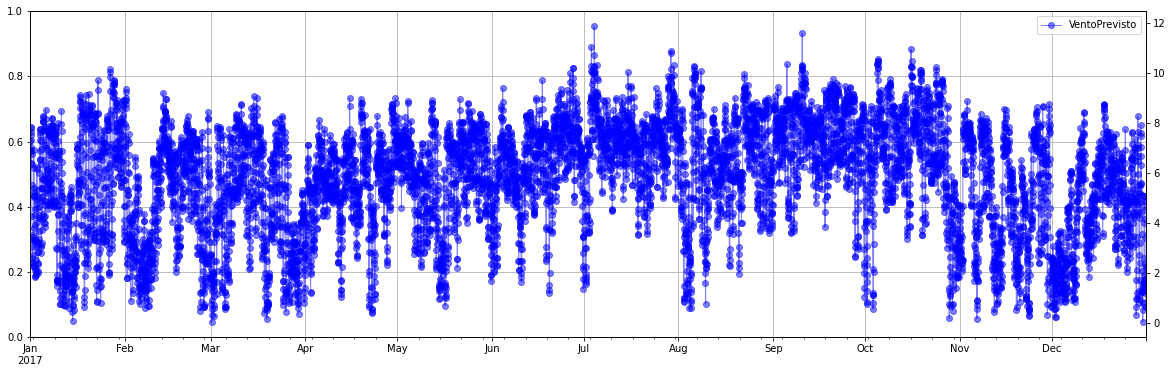

In [5]:
fig = pyplot.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
_ = df_day.plot(y='VentoPrevisto', ax=ax2, lw=1, marker='o', color='blue', alpha=0.5)
#_ = df_day.plot(y='Temperatura', ax=ax, lw=1, marker='o', color='red', alpha=0.75)
_ = ax.grid()

In [6]:
df_day['V_d1'] = df_day['VentoPrevisto'].shift(-1)
df_day['V_l1'] = df_day['VentoPrevisto'].shift(1)
df_day['V_l2'] = df_day['VentoPrevisto'].shift(2)
df_day['V_l3'] = df_day['VentoPrevisto'].shift(3)
df_day['V_l4'] = df_day['VentoPrevisto'].shift(4)
df_day['V_l5'] = df_day['VentoPrevisto'].shift(5)
df_day['V_l6'] = df_day['VentoPrevisto'].shift(6)
df_day['V_l7'] = df_day['VentoPrevisto'].shift(7)

df_day['C_l1'] = df_day['Chuva'].shift(1)
df_day['C_l2'] = df_day['Chuva'].shift(2)
df_day['C_l3'] = df_day['Chuva'].shift(3)
df_day['C_l4'] = df_day['Chuva'].shift(4)
df_day['C_l5'] = df_day['Chuva'].shift(5)
df_day['C_l6'] = df_day['Chuva'].shift(6)
df_day['C_l7'] = df_day['Chuva'].shift(7)

df_day['D_l1'] = df_day['Direcao'].shift(1)
df_day['D_l2'] = df_day['Direcao'].shift(2)
df_day['D_l3'] = df_day['Direcao'].shift(3)
df_day['D_l4'] = df_day['Direcao'].shift(4)
df_day['D_l5'] = df_day['Direcao'].shift(5)
df_day['D_l6'] = df_day['Direcao'].shift(6)
df_day['D_l7'] = df_day['Direcao'].shift(7)

df_day['P_l1'] = df_day['Pressao'].shift(1)
df_day['P_l2'] = df_day['Pressao'].shift(2)
df_day['P_l3'] = df_day['Pressao'].shift(3)
df_day['P_l4'] = df_day['Pressao'].shift(4)
df_day['P_l5'] = df_day['Pressao'].shift(5)
df_day['P_l6'] = df_day['Pressao'].shift(6)
df_day['P_l7'] = df_day['Pressao'].shift(7)

df_day['T_l1'] = df_day['Temperatura'].shift(1)
df_day['T_l2'] = df_day['Temperatura'].shift(2)
df_day['T_l3'] = df_day['Temperatura'].shift(3)
df_day['T_l4'] = df_day['Temperatura'].shift(4)
df_day['T_l5'] = df_day['Temperatura'].shift(5)
df_day['T_l6'] = df_day['Temperatura'].shift(6)
df_day['T_l7'] = df_day['Temperatura'].shift(7)

complete_cases = ~df_day.isna().any(axis=1)
dfn = df_day[complete_cases]

In [7]:
df_day.head(-2)

,VentoPrevisto,Chuva,Pressao,Temperatura,Direcao,V_d1,V_l1,V_l2,V_l3,V_l4,...,P_l5,P_l6,P_l7,T_l1,T_l2,T_l3,T_l4,T_l5,T_l6,T_l7
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.82,0.00,1013.14,25.93,97.36,6.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,6.91,0.00,1013.34,25.73,94.65,7.27,6.82,NaN,NaN,NaN,...,NaN,NaN,NaN,25.93,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,7.27,0.00,1013.04,25.50,92.98,7.83,6.91,6.82,NaN,NaN,...,NaN,NaN,NaN,25.73,25.93,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,7.83,0.00,1012.92,23.67,93.62,7.81,7.27,6.91,6.82,NaN,...,NaN,NaN,NaN,25.50,25.73,25.93,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,7.81,0.00,1013.07,22.97,96.33,7.63,7.83,7.27,6.91,6.82,...,NaN,NaN,NaN,23.67,25.50,25.73,25.93,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 17:00:00,1.32,0.00,1011.67,32.45,117.25,1.56,1.18,1.72,2.37,3.40,...,1014.47,1014.24,1013.91,31.76,32.05,27.98,27.85,27.46,27.06,26.28
2017-12-31 18:00:00,1.56,0.00,1010.69,32.38,108.61,1.79,1.32,1.18,1.72,2.37,...,1014.52,1014.47,1014.24,32.45,31.76,32.05,27.98,27.85,27.46,27.06
2017-12-31 19:00:00,1.79,0.01,1010.20,32.56,92.88,2.26,1.56,1.32,1.18,1.72,...,1014.04,1014.52,1014.47,32.38,32.45,31.76,32.05,27.98,27.85,27.46


In [8]:
data_atual = datetime.datetime.now()
print(data_atual)

2021-09-25 11:38:51.020198


In [9]:
# TRAINING
n_test_samples = 720
n_validation_samples = 720
random_seed = 720

#n_test_samples = 30
#n_validation_samples = 30
#random_seed = 32

# SET THE RANDOM SEED
numpy.random.seed(random_seed)
tensorflow.random.set_seed(random_seed)

x_cols = ['VentoPrevisto', 'V_l1','V_l2','V_l3','V_l4','V_l5','V_l6','V_l7',  'C_l1','C_l2','C_l3','C_l4','C_l5','C_l6','C_l7',  'D_l1','D_l2','D_l3','D_l4','D_l5','D_l6','D_l7',  'P_l1','P_l2','P_l3','P_l4','P_l5','P_l6','P_l7', 'T_l1','T_l2','T_l3','T_l4','T_l5','T_l6','T_l7']
y_cols = ['V_d1']

# SAMPLING
X_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][x_cols].to_numpy()
X_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][x_cols].to_numpy()
X_tst = dfn[x_cols].to_numpy()
Y_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][y_cols].to_numpy()
Y_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][y_cols].to_numpy()

# SCALING X
X_scaler = StandardScaler()
X_scaler = X_scaler.fit(X_trn)
X_trn_scaled = X_scaler.transform(X_trn)
X_val_scaled = X_scaler.transform(X_val)
X_tst_scaled = X_scaler.transform(X_tst)

# SCALING Y
Y_scaler = StandardScaler()
Y_scaler = Y_scaler.fit(Y_trn)
Y_trn_scaled = Y_scaler.transform(Y_trn)
Y_val_scaled = Y_scaler.transform(Y_val)

# DECLARE NET
max_neurons = 20
PATIENCE = 250
MAX_EPOCHS = 10*PATIENCE
LEARNING_RATE = 0.01
HIDDEN_ACTIVATION = 'sigmoid'
MODEL_LOSS = 'val_loss'
MIN_IMPROVEMENT = 0.025

best_loss = 1000.0
best_val_loss = 1000.0
training_result_list = []
for n_neurons in numpy.arange(max_neurons) + 1:
    
    inputs = keras.Input(shape=(X_trn_scaled.shape[1]))  # Define input (features) layer
    hidden = keras.layers.Dense(n_neurons, activation=HIDDEN_ACTIVATION)(inputs) # Define first dense layer , use_bias=True
    outputs = keras.layers.Dense(Y_trn_scaled.shape[1], activation='linear')(hidden) #'linear'
    
    #ativacoes: sigmoid (Sigmoide)*, tanh (Tangente Hiperbólica) *, relu (Unidade Linear Retificada) *, elu **(Unidade Linear Exponencial).
    #           softmax*, selu*, softsign , exponential
    # use_bias:True  >> tf.keras.layers.Dense(units,activation=None,use_bias=True,
        
    model_name = 'FORECAST_{}_{}'.format(HIDDEN_ACTIVATION, n_neurons)
    my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
    
    #* otimizacao = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    # otimizacao = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
    # otimizacao = tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE, momentum=0.9)
    my_net.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')
   
    
    es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=PATIENCE, restore_best_weights=True)
    history = my_net.fit(X_trn_scaled, Y_trn_scaled, epochs=MAX_EPOCHS, validation_data=(X_val_scaled, Y_val_scaled), batch_size=X_trn_scaled.shape[0], callbacks=[es_callback], verbose=0)
    
    model_loss = history.history['loss'][-1]
    model_val_loss = history.history['val_loss'][-1]
    epochs = len(history.history['val_loss'])

    has_improved_val_loss = False
    loss_improvement = 1.0 - model_val_loss/best_val_loss

    if loss_improvement >= MIN_IMPROVEMENT:
        is_best_net = ((model_loss <= best_loss) & (model_val_loss < best_val_loss))

        if is_best_net:
                best_loss = model_loss
                best_val_loss = model_val_loss
                best_net = my_net
                best_history = history
                best_text = '***BEST NET!***'
                improvement_text = '{:.0f}% GAIN'.format(100.0*loss_improvement)
                best_name = model_name
                best_epochs = epochs
        else:
            best_text = ''
            improvement_text = ''
    else:
        print('EXTRA NEURON DIDNT IMPROVE NET {:.0f}% GAIN'.format(100.0*loss_improvement))
        break
    
    result_dict = {'model_name': model_name, 'epochs': epochs, 'model_loss': model_loss, 'model_val_loss': model_val_loss, 'best_net':is_best_net}
    
    
    training_result_list.append(result_dict)
    print('{} RESULTS > EPOCHS: {} LOSS: {:.3f} VAL_LOSS: {:.3f} {} {}'.format(model_name, epochs, model_loss, model_val_loss, best_text, improvement_text)) 

FORECAST_sigmoid_1 RESULTS > EPOCHS: 2347 LOSS: 0.051 VAL_LOSS: 0.065 ***BEST NET!*** 100% GAIN
EXTRA NEURON DIDNT IMPROVE NET 1% GAIN


In [10]:
Y_est_scaled = best_net.predict(X_tst_scaled)

Y_est = Y_scaler.inverse_transform(Y_est_scaled)


df_day.loc[complete_cases, ['Y_est']] = numpy.around(Y_est,3)
df_day['residual'] = df_day['Y_est'] - df_day['V_d1']
df_day['rabs'] = df_day['residual'].abs()


model_r2_score = r2_score(df_day.loc[complete_cases, 'V_d1'].to_numpy(), df_day.loc[complete_cases, 'Y_est'].to_numpy())


In [11]:
data_atual = datetime.datetime.now()
print(data_atual)

2021-09-25 11:51:17.370435


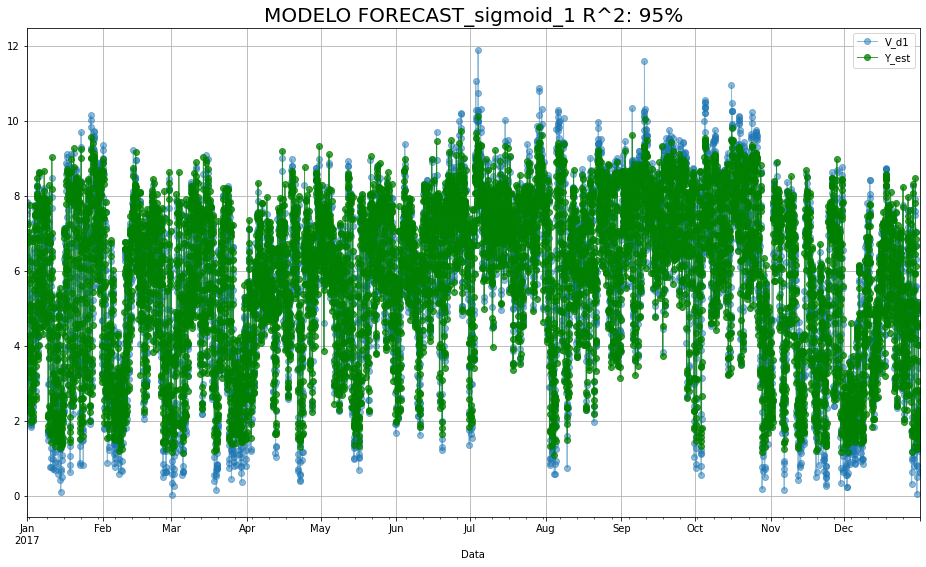

In [12]:
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
_ = df_day.plot(y='V_d1', ax=ax, lw=1, marker='o', alpha=0.5)
_ = df_day.plot(y='Y_est', ax=ax, lw=1, marker='o', alpha=0.75, color='green')
_ = ax.grid()
_ = ax.set_title('MODELO {} R^2: {:.0f}%'.format(best_name, 100.0*model_r2_score), size=20)

#df_day.sort_values('rabs', ascending=True)
index_janine = df_day["V_d1"] > 10
df_day.loc[index_janine,["Y_est","V_d1","residual"]]


df_day.head(-2)


In [13]:
output_file = '../../../../PrevisaoVento/Data/process/cenario1/predicao_cenario1.csv'
df_day.to_csv(output_file, sep=';', encoding='utf-8')

<h3>Instrução para exportação do modelo da rede neural</3>

In [14]:
from keras.models import load_model

# ** EXPOTACAO DO MODELO
model_file = '../../../../PrevisaoVento/Code/Model/modeloC1_sigmoid_previsao.pkl'
tensorflow.keras.models.save_model(best_net, model_file)


# ** IMPORTACAO DO MODELO
# model = load_model(model_file)

# ** TESTE DO MODELO IMPORTADO
# model.predict(numpy.array([[1, 10,11,13,  10,12,13 ,   90,91,90,  800,880,870  , 26,28,29]]))

INFO:tensorflow:Assets written to: ../../../../PrevisaoVento/Code/Model/modeloC1_sigmoid_previsao.pkl\assets
